# Task-2
## Exploratory Data Analysis (EDA)

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set visualization style
sns.set(style='whitegrid')

# loading of the raw Data

In [2]:
# read the dataset
df = pd.read_csv('F:/Credit-Risk-Model/data/raw/data.csv')
# display the first few rows of the dataset


# Overveiw of Data
- this is to - first understand data shape the number column and rows 
- Displaying few data set ot look at the the Overveiw of the dataset


In [4]:
# display the first few rows of the dataset
print(df.head())
# display the shape of the dataset
print(f"Shape of the dataset: {df.shape}")


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

**Data Types of columns**
- This section used to understand the types of data in each columns  

In [4]:
# Data types 
print("Data types of the columns:")
print(df.dtypes)

Data types of the columns:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


 # Statistics Summary
 -  show us the Statistical Analysis of given dataset which include mean,std,minimum,maximum and percentage of numerical columns

In [5]:
# statistics summary
print("Statistics Summary:")
print("======================================================================================")
print(df.describe())
print("======================================================================================")

Statistics Summary:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


**Identify numerical and categorical column**

In [4]:
#identify numerical and categorical column
print("Identify numerical and categorical columns:")
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_columns}")
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Categorical columns: {categorical_columns}")


Identify numerical and categorical columns:
Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


## Distribution of Numerical Features
- Visualization of the distribution of numerical features to identify patterns, skewness, and potential outliers.

Distribution of Numerical Features:


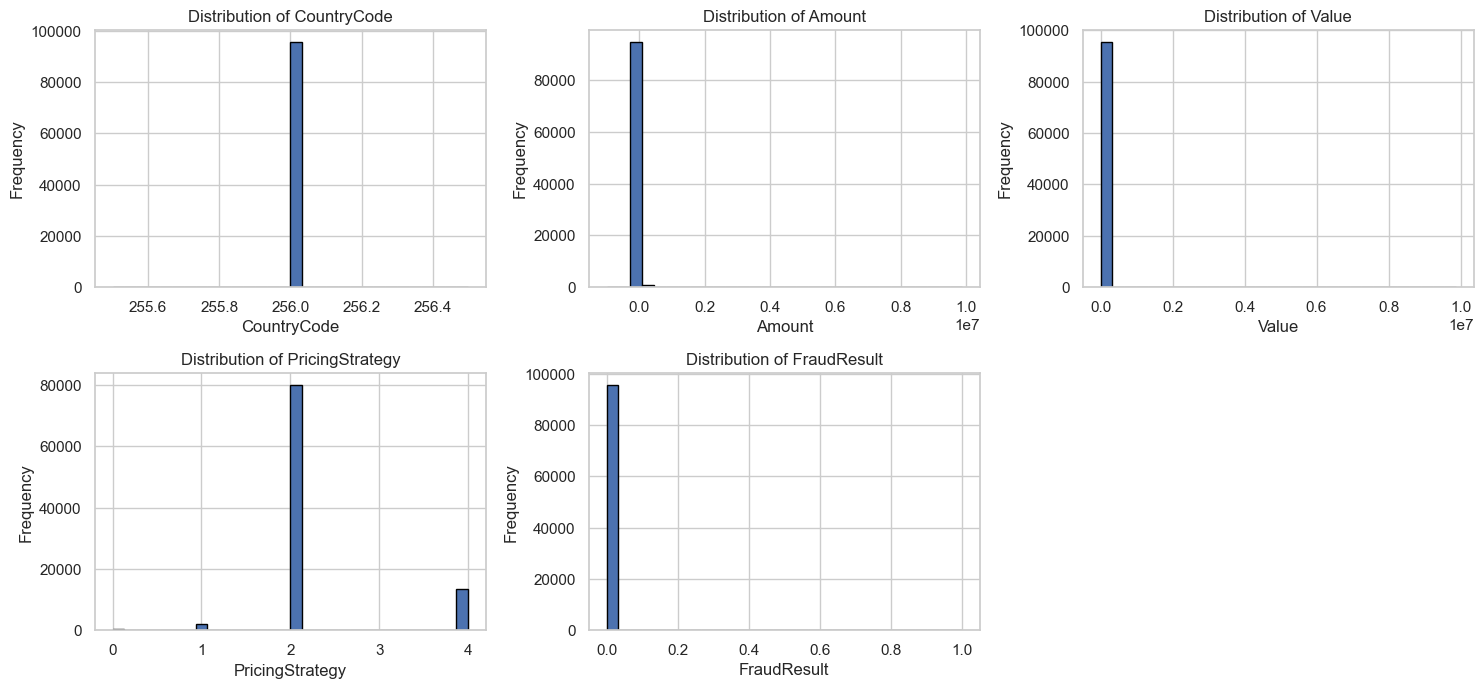

In [9]:
#visualization of the distribution of numerical features to identify patterns, skewness, and potential outliers.
print("Distribution of Numerical Features:")
# all numerical columns in one figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



## Distribution of categorical

In [ ]:
# distribution of categorical featuresprint("Distribution of Categorical Features:")
# all categorical columns in one figure     
print("Distribution of Categorical Features:")
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()

Distribution of Categorical Features:


# C

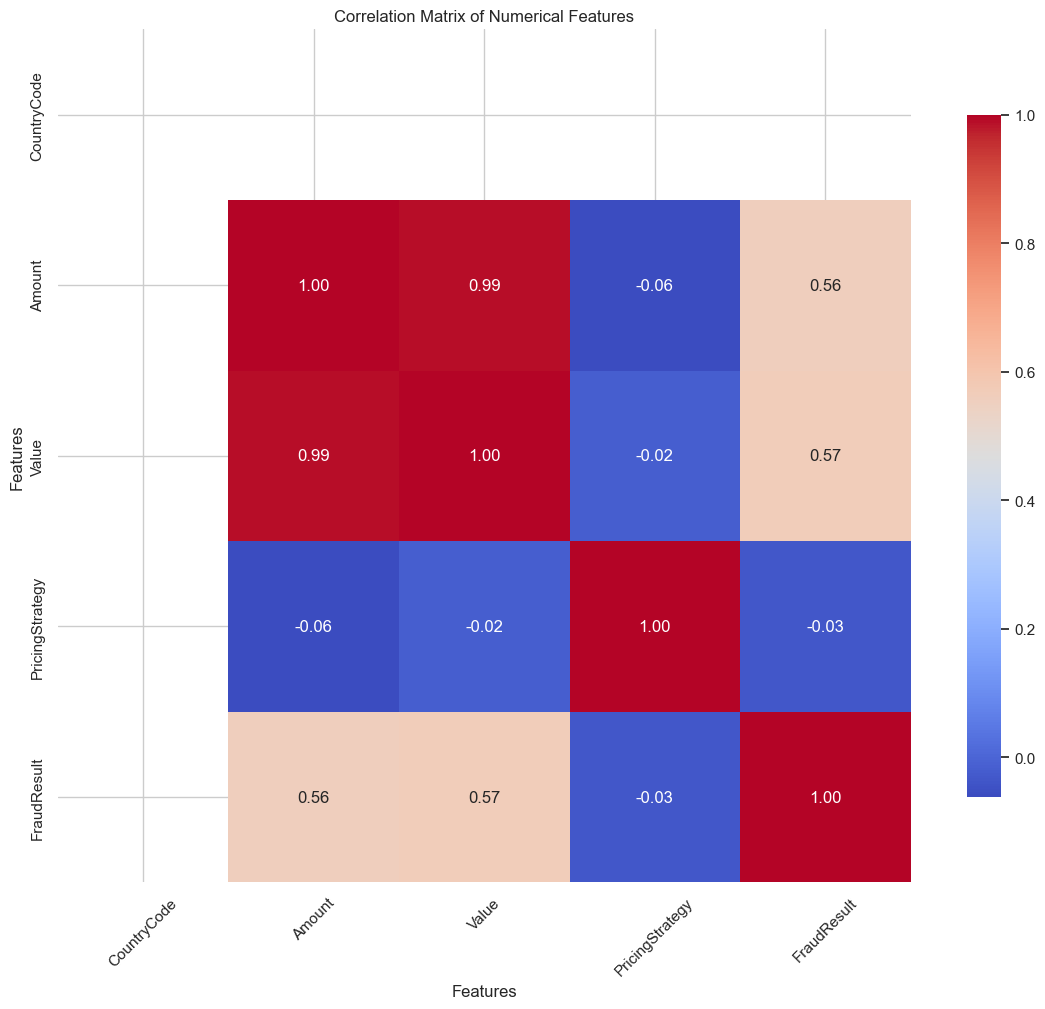

In [7]:
#cooration matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
#plt.tight_layout()
#set the axis labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix of Numerical Features')
#axis labels and title
plt.xticks(rotation=45)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Identify missing Values 

In [ ]:
# MISSING VALUES
# Identify missing Values
print("Identify missing Values")
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values[missing_values > 0])
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Outlier Detection 

In [ ]:
# outlier detection
print("Outlier Detection")
# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()
# Display the number of unique values in each categorical column
pri
